# Name: Tooba azam 

# Id: 2020-1-60-262

# Sec: 2

 Cell 1: Mounting Google Drive

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cell 2: Reading and Exploring Data

In [24]:
import pandas as pd
path = "/content/drive/MyDrive/Ai366/seeds.csv"
df= pd.read_csv(path)

Cell 3: Importing Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Cell 4: Data Visualization

<Axes: >

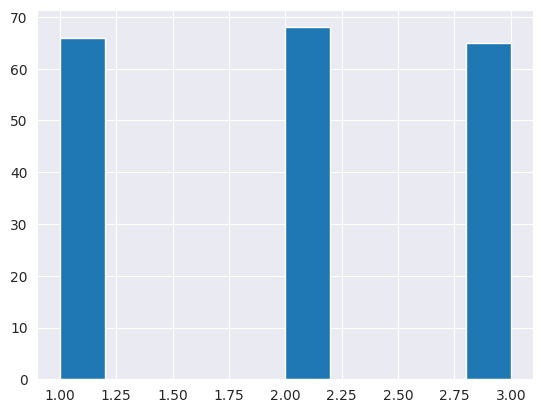

In [26]:
df["Type"].hist()

Cell 5: Correlation Heatmap

<Axes: >

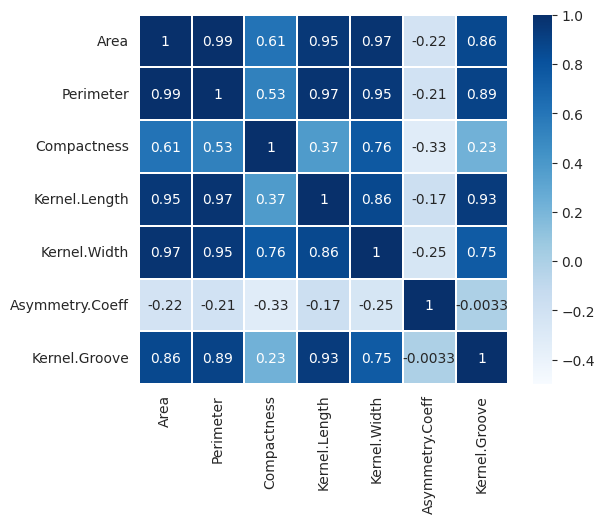

In [27]:
corr = df.iloc[:,:-1].corr(method= "pearson")
cmap= sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax= 1, vmin= -0.5, cmap="Blues", square = True, linewidths = 0.2,annot=True)


Cell 6: Selecting Relevant Columns

In [28]:
df = df[["Compactness","Kernel.Length", "Kernel.Width","Asymmetry.Coeff", "Kernel.Groove","Type"]]
df.head(10)

,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.8710,5.763,3.312,2.221,5.220,1
1,0.8811,5.554,3.333,1.018,4.956,1
2,0.9050,5.291,3.337,2.699,4.825,1
3,0.8955,5.324,3.379,2.259,4.805,1
4,0.9034,5.658,3.562,1.355,5.175,1
5,0.8951,5.386,3.312,2.462,4.956,1
6,0.8799,5.563,3.259,3.586,5.219,1
7,0.8747,6.053,3.465,2.040,5.877,1
8,0.8880,5.884,3.505,1.969,5.533,1
9,0.8696,5.714,3.242,4.543,5.314,1


Cell 7: Histogram Subplots

<Axes: xlabel='Kernel.Groove', ylabel='Count'>

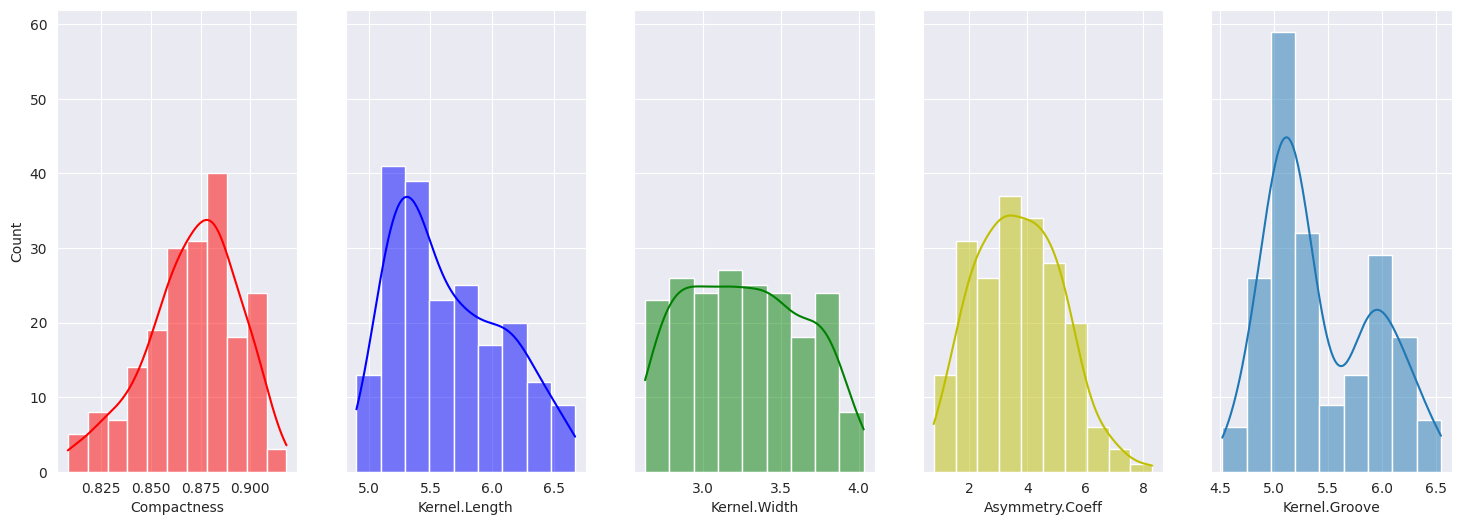

In [29]:
fig, axes=plt.subplots(1,5,figsize=(18,6), sharey = True)
sns.histplot(df, ax=axes[0], x="Compactness", kde=True, color='r')
sns.histplot(df, ax=axes[1], x="Kernel.Length", kde=True, color='b')
sns.histplot(df, ax=axes[2], x="Kernel.Width", kde=True, color='g')
sns.histplot(df, ax=axes[3], x="Asymmetry.Coeff", kde=True, color='y')
sns.histplot(df, ax=axes[4], x="Kernel.Groove", kde=True)

# **Naive Bayesian:**



Cell 8: Prior Probability Calculation

In [30]:
def prior_prob(data, Y):
  classes = sorted(list(data[Y].unique()))
  prior=[]
  for i in classes:
    prior.append(len(data[data[Y]==i])/len(data))
  return prior

Cell 9: Likelihood Probability Calculation

In [31]:
def likelihood_prob(data, ft_name, ft_val, Y, label):
  ft = list(data.columns)
  data = data[data[Y]==label]
  mean = data[ft_name].mean()
  std = data[ft_name].std()
  likehd = (1/(np.sqrt(2*np.pi)*std))*np.exp(-((ft_val - mean)**2 /(2 * std**2 )))
  return likehd 

likelihood : 

P(X= x0,x1,x2 | Y=y)

= P(X=x0|Y=y) *P(X=x1|Y=y) * P(X=x2|Y=y)

Cell 10: Naive Bayes Classification

In [32]:
def Naive_Bayesian(data, X, Y):
    features = list(data.columns)[:-1] # {Compactness , Kernel.Length etc  .} 

    prior = prior_prob(data, Y) # prior probability of every class. 1 =  0.8 , 2 =0.2

    Y_pred = []
    
    for x in X: # Iterate over each row 
        labels = sorted(list(data[Y].unique())) 
        likelihood = [1] * len(labels) # Initially Assign 1 for each class
        
        for j in range(len(labels)): #For each class , {1,2}
            for i in range(len(features)): # For each features {Compactness , Kernel.Length etc  .}
                likelihood[j] *= likelihood_prob(data, features[i], x[i], Y, labels[j])
                
        post_prob = [1] * len(labels)
        
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
            
        predicted_class = labels[np.argmax(post_prob)] # Returns the index of the maximum probability and passes it through the labels to see which label
        Y_pred.append(predicted_class) #Appends the label
    
    return np.array(Y_pred)

Cell 11: Data Preparation and Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score

newDF = df.copy()
x = newDF[["Compactness","Kernel.Length", "Kernel.Width","Asymmetry.Coeff", "Kernel.Groove"]]
y = newDF[["Type"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=41)
 

Cell 12: Naive Bayes Classification and Evaluation

In [34]:
Y_pred = Naive_Bayesian(df, X=x_test.values, Y="Type")

print(accuracy_score(y_test, Y_pred))
print(recall_score(y_test, Y_pred,average=None))

1.0
[1. 1. 1.]


# **Perceptron:**

Cell 13: Perceptron Equation

In [35]:
def f(X, W):
  return W[0] + np.dot(X, W[1:])

Cell 14: Activation Function

In [36]:
def A(x):
  if x>0:
    return 1
  else:
    return 0

Cell 15: Perceptron Classifier

In [37]:
def Y(X, W):
  return A(f(X,W))

Cell 16: Mean Squared Error (MSE)

In [38]:
def MSE(Pred, T):
  return np.mean((np.array(Pred) - T) ** 2)

Cell 17: Backpropagation

In [39]:
def back_prop(X, T, W, n):
  target = []
  for i in range(len(X)):
    x = X.iloc[i].values
    t = T[i][0]
    pred = Y(x, W)
    target.append(pred)
    delw = n * (t - pred)
    W[0] += delw * 1  # Update bias weight
    W[1:] += delw * x  # Update feature weights
  return target, W


Cell 18:Training

In [40]:
def train(x_train, y_train):
  W = np.zeros(x_train.shape[1] + 1)  # Initializing weights
  n = 0.05  # Learning rate
  epoch = 0
  prev_mse = np.inf
  best_W = None

  while True:
    target, W = back_prop(x_train, y_train, W, n)
    MSE_value = MSE(target, y_train)   

    epoch += 1
    print(f"Epoch {epoch}: MSE = {MSE_value}")
    
    if epoch > 1 and MSE_value >= prev_mse:
      break
    
    prev_mse = MSE_value
    
    if best_W is None or MSE_value < best_mse:
      best_W = np.copy(W)
      best_mse = MSE_value

  return best_W, best_mse

Cell 19: Perceptron Model Evaluation

In [41]:
def ppn_accuracy(x_test, y_test, W):
  accurate_preds = 0
  for i in range(len(x_test)):
    X = x_test.iloc[i].values
    T = y_test[i][0]
    P = Y(X, W)
    if P == 1 and T == 1:
      accurate_preds += 1
    elif P == 0 and T == 0:
      accurate_preds += 1
    
  accuracy = accurate_preds/len(x_test)
  return accuracy

x_train = pd.DataFrame(x_train) 
x_test = pd.DataFrame(x_test)  
y_train = np.array(y_train).reshape(-1, 1) 
y_test = np.array(y_test).reshape(-1, 1) 

weights, train_mse = train(x_train, y_train)
accuracy_p = ppn_accuracy(x_test, y_test, weights)
acc_p = accuracy_p * 100
print(f"Train MSE: {train_mse}")
print(f"Test Accuracy: {acc_p}%")
print(f"Learned Weights: {weights}")

Epoch 1: MSE = 1.609187353383985
Epoch 2: MSE = 1.5917159763313609
Epoch 3: MSE = 1.5917159763313609
Train MSE: 1.5917159763313609
Test Accuracy: 33.33333333333333%
Learned Weights: [16.55     14.275895 92.35715  52.43395  72.4686   90.3578  ]
